In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in California housing dataset.
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()

In [17]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(housing.data, columns=housing.feature_names)[['AveRooms']]
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [20]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test_scaled)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.0182


In [24]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 1.2991
Root Mean Squared Error: 1.1398


In [25]:
housing = fetch_california_housing()


# Split into X, y.
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # Median house value in $100,000s
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data.
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create model and fit it to the training data.
model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Make predictions.
y_pred = model.predict(X_test_scaled)


# Calculate and print errors.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")


rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.5758
Mean squared error: 0.5559
Root mean squared error: 0.7456


/Users/long/158/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/long/158/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/long/158/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


- Choosing the most relevant features from the dataset is known as feature selection.
- Multicollinearity: when multiple features give the model the same information, which is redundant

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = pd.DataFrame(housing.data, columns=housing.feature_names)

corr_matrix = X.corr()

high_corr_features = [(col1, col2, corr_matrix.loc[col1, col2])
                     for col1 in corr_matrix.columns
                     for col2 in corr_matrix.columns
                     if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]

collinearity_df = pd.DataFrame(high_corr_features, columns=['Feature 1', 'Feature 2', 'Correlation'])
print("\highly correlated features (|correlation| > 0.8):\n", collinearity_df)

# calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF) for each feature\n", vif_data)

\highly correlated features (|correlation| > 0.8):
    Feature 1  Feature 2  Correlation
0   AveRooms  AveBedrms     0.847621
1  AveBedrms   AveRooms     0.847621
2   Latitude  Longitude    -0.924664
3  Longitude   Latitude    -0.924664

Variance Inflation Factor (VIF) for each feature
       Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [35]:
housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns=housing.feature_names).drop(columns=['AveBedrms'])
y = housing.target

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data (Standardization).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a linear regression model and train it.
model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Make predictions on the test set.
y_pred = model.predict(X_test_scaled)


# Calculate performance metrics.
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Print evaluation metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")


R-squared: 0.5823
Mean squared error: 0.5473
Root mean squared error: 0.7398


/Users/long/158/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/long/158/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/long/158/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [36]:
print("Intercept:", model.intercept_)

coeff_df = pd.DataFrame({"Features": X.columns, "Coefficient": model.coef_})
print("\nCoefficients:\n", coeff_df)

Intercept: 2.0719469373788777

Coefficients:
      Features  Coefficient
0      MedInc     0.708260
1    HouseAge     0.123406
2    AveRooms     0.045637
3  Population    -0.003305
4    AveOccup    -0.037483
5    Latitude    -0.978290
6   Longitude    -0.931742


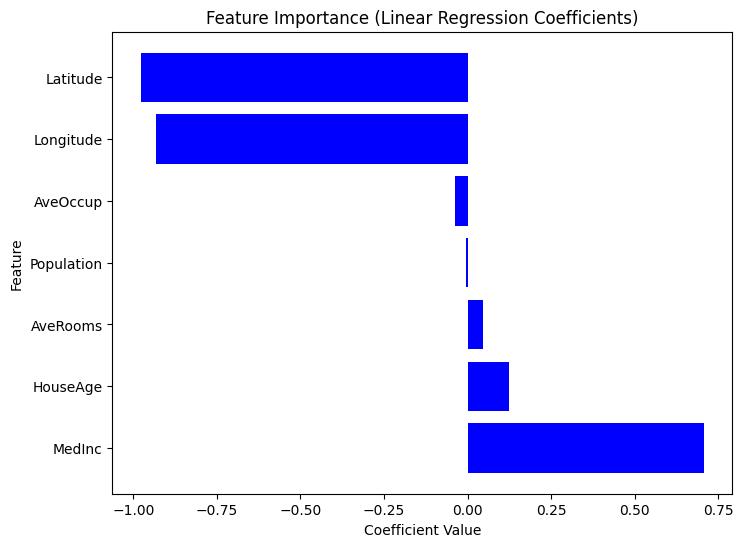

In [41]:
coeff_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coeff_df["Features"], coeff_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

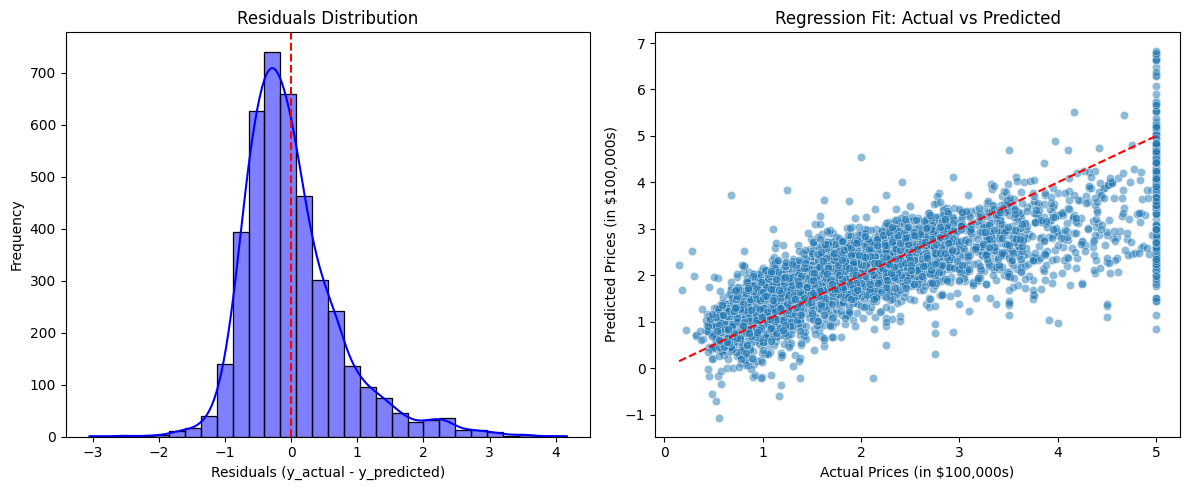

In [42]:
# Compute residuals.
residuals = y_test - y_pred


# Create plots.
plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices (in $100,000s)")
plt.ylabel("Predicted Prices (in $100,000s)")


# Show plots.
plt.tight_layout()
plt.show()